<a href="https://colab.research.google.com/github/LuizZaghetto/ProjetosIA/blob/main/ProjetoCaminh%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Definição das Funções

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def txtToLista(caminho_arquivo):

    lista = []
    try:
        with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
            lista = arquivo.read()
    except FileNotFoundError:
        print(f"O arquivo {caminho_arquivo} não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro ao ler o arquivo: {e}")

    lista = lista.split()
    lista = [int(i) for i in lista]
    return lista

In [ ]:
def busca_caminho(grafo, origem, destino, peso_limite):
    # Criar um subgrafo contendo apenas as arestas que suportam o peso limite
    subgrafo = nx.Graph()

    # Adiciona todos os vértices do grafo principal ao subgrafo
    for no in grafo.nodes():
        subgrafo.add_node(no)

    # Percorre todas as arestas do grafo original, se alguma delas tiver um peso
    # menor ao peso_limite não é adicionada
    for u, v, data in grafo.edges(data=True):
        if data['weight'] >= peso_limite:
            subgrafo.add_edge(u, v, weight=data['weight'])

    try:
        # Encontra o caminho mais curto no grafo filtrado
        caminho = nx.shortest_path(subgrafo, source=origem, target=destino)
        return caminho
    except nx.NetworkXNoPath:
        # Se não houver caminho possível
        return None


In [ ]:
def define_peso(grafo, origem, destino):

  # Acha a aresta com maior peso no grafo e salva o valor
  maior_peso = 0
  for u, v, data in grafo.edges(data = True):
    if data['weight'] > maior_peso:
      maior_peso = data['weight']

  # Busca o menor caminho possível com o peso fornecido
  while(True):
    # Primeiro ele tenta com o maior peso, se der certo já retorna o valor
    caminho = busca_caminho(grafo, origem, destino, maior_peso)
    if caminho:
      return maior_peso
    # Em caso de falha diminue o peso em 1 e tenta novamente, no caso do peso
    # zerar termina a execução
    maior_peso = maior_peso - 1
    if maior_peso == 0:
      return None


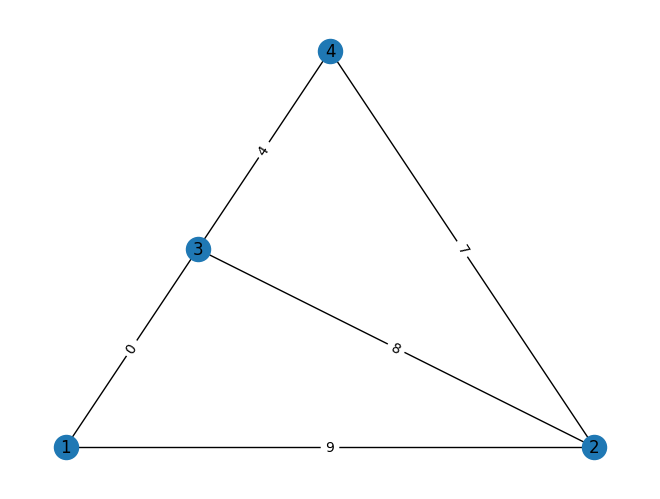

In [ ]:
def plotar_grafo(I, P, pontes):

    G = nx.Graph()

    # Monta as arestas com seu peso
    for (A, B, P) in pontes:
        G.add_edge(A, B, weight=P)

    # Plota o grafo
    layout = nx.planar_layout(G)
    nx.draw(G, with_labels=True, pos = layout)
    nx.draw_networkx_edge_labels(G, pos = layout, edge_labels = nx.get_edge_attributes(G, 'weight'))

I = 4
P = 5
pontes = [(1, 2, 9), (1, 3, 0), (2, 3, 8), (2, 4, 7), (3, 4, 4)]

plotar_grafo(I, P, pontes)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plotar_grafo_com_entrada(entrada):
    # Obtêm o número de ilhas, pontes e caminhos
    index = 0
    N = entrada[index]
    index += 1
    M = entrada[index]
    index += 1
    C = entrada[index]
    index += 1

    # Monta a lista de pontes percorrendo a entrada pelo número de arestas
    pontes = []
    for _ in range(M):
        A = entrada[index]
        index += 1
        B = entrada[index]
        index += 1
        P = entrada[index]
        index += 1
        pontes.append([A, B, P])

    # Monta a lista de caminhos percorrendo a entrada pelo número de caminhos
    caminhos = []
    for _ in range(C):
        A = entrada[index]
        index += 1
        B = entrada[index]
        index += 1
        caminhos.append([A, B])

    G = nx.Graph()

    # Adicionando as arestas (pontes) ao grafo
    for ponte in pontes:
        A, B, P = ponte
        G.add_edge(A, B, weight=P)

    layout = nx.planar_layout(G)
    nx.draw(G, with_labels=True, pos = layout)
    nx.draw_networkx_edge_labels(G, pos = layout, edge_labels = nx.get_edge_attributes(G, 'weight'))

    # Definindo e imprimindo o maior peso possível para cada caminho
    for caminho in caminhos:
        origem, destino = caminho
        maior_peso = define_peso(G, origem, destino)
        trajeto = busca_caminho(G, origem, destino, maior_peso)
        print(f"O caminho é {origem} para {destino}, o peso máximo é {maior_peso} e o melhor trajeto é {trajeto}")

## Grafos Teste

{(0, 4): Text(0.8830167981168309, 0.3214087013244753, '7'),
 (4, 7): Text(0.7660443798302576, 1.9866491220987825e-06, '1'),
 (1, 3): Text(-0.16316697596348817, 0.9254181481125385, '5'),
 (1, 5): Text(-0.38302906058135844, 0.6634100189229266, '4'),
 (1, 6): Text(-0.38302812839432987, 0.32138672543711944, '5'),
 (3, 2): Text(-0.4999999751654026, 7.792772307668727e-06, '11'),
 (3, 5): Text(-0.7198456401242082, 0.604023634952241, '11'),
 (6, 7): Text(-0.08682744184510716, -0.49240334923252327, '3'),
 (2, 8): Text(-0.16318480024718052, -0.9254149873948743, '4')}

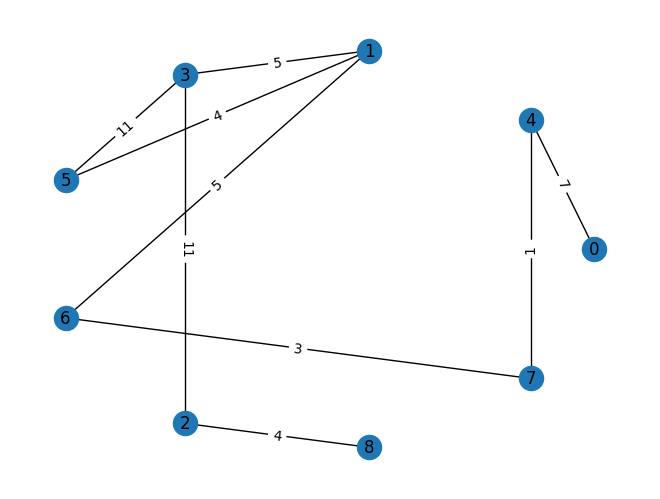

In [ ]:
# prompt: Faça o grafo com matriz de adjaçência
# 0, 0, 0, 0, 7, 0, 0, 0, 0,
# 0, 0, 0, 5, 0, 4, 5, 0, 0,
# 0, 0, 0, 11, 0, 0, 0, 0, 4,
# 0, 5, 11, 0, 0, 11, 0, 0, 0,
# 7, 0, 0, 0, 0, 0, 0, 1, 0,
# 0, 4, 0, 11, 0, 0, 0, 0, 0,
# 0, 5, 0, 0, 0, 0, 0, 3, 0,
# 0, 0, 0, 0, 1, 0, 3, 0, 0,
# 0, 0, 4, 0, 0, 0, 0, 0, 0,

# Create the graph from the adjacency matrix
Gt = nx.Graph()
adj_matrix = [[0, 0, 0, 0, 7, 0, 0, 0, 0],
              [0, 0, 0, 5, 0, 4, 5, 0, 0],
              [0, 0, 0, 11, 0, 0, 0, 0, 4],
              [0, 5, 11, 0, 0, 11, 0, 0, 0],
              [7, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 4, 0, 11, 0, 0, 0, 0, 0],
              [0, 5, 0, 0, 0, 0, 0, 3, 0],
              [0, 0, 0, 0, 1, 0, 3, 0, 0],
              [0, 0, 4, 0, 0, 0, 0, 0, 0]]

# Add nodes and edges to the graph
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j] != 0:
            Gt.add_edge(i, j, weight=adj_matrix[i][j])

layout = nx.circular_layout(Gt)
# Draw the graph
nx.draw(Gt, with_labels=True, pos = layout)
nx.draw_networkx_edge_labels(Gt, pos = layout, edge_labels = nx.get_edge_attributes(Gt, 'weight'))

{(0, 4): Text(-0.27834982770739947, -0.25773186051195546, '1'),
 (0, 5): Text(-0.3814345415724807, -0.2061833776611614, '4'),
 (0, 6): Text(-0.6391766650641828, -1.4073322239238628e-06, '9'),
 (0, 9): Text(-0.1752468748978272, -0.36082474226804123, '5'),
 (4, 7): Text(0.18556534962070947, 0.10309444419372366, '4'),
 (4, 8): Text(0.4948480647326132, -0.20618827091818, '7'),
 (5, 1): Text(0.03092542340614135, 6.029113512329154e-07, '9'),
 (5, 3): Text(0.0309266773791812, 0.10309365175942858, '11'),
 (6, 3): Text(-0.22680141980346935, 0.30927564660759305, '8'),
 (9, 8): Text(0.5979354404220263, -0.3092756466075932, '11'),
 (1, 2): Text(-0.17525773195876282, 0.10309101629656597, '5'),
 (2, 3): Text(-0.17525773195876282, 0.2061837998017208, '8'),
 (3, 7): Text(-0.12370863629831463, 0.3092810544233346, '11')}

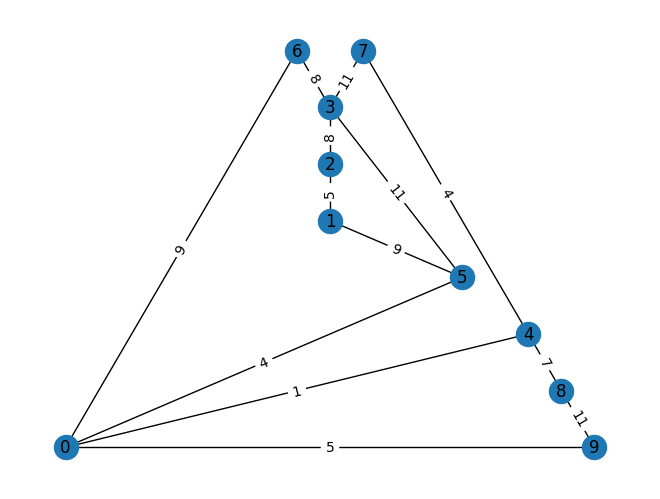

In [ ]:
# prompt: Faça o grafo de nome upa com a matriz de adjacência
# 0, 0, 0, 0, 1, 4, 9, 0, 0, 5,
# 0, 0, 5, 0, 0, 9, 0, 0, 0, 0,
# 0, 5, 0, 8, 0, 0, 0, 0, 0, 0,
# 0, 0, 8, 0, 0, 11, 8, 11, 0, 0,
# 1, 0, 0, 0, 0, 0, 0, 4, 7, 0,
# 4, 9, 0, 11, 0, 0, 0, 0, 0, 0,
# 9, 0, 0, 8, 0, 0, 0, 0, 0, 0,
# 0, 0, 0, 11, 4, 0, 0, 0, 0, 0,
# 0, 0, 0, 0, 7, 0, 0, 0, 0, 11,
# 5, 0, 0, 0, 0, 0, 0, 0, 11, 0,

import networkx as nx
import numpy as np

# Create the graph from the adjacency matrix
upa = nx.Graph()
adj_matrix = [[0, 0, 0, 0, 1, 4, 9, 0, 0, 5],
              [0, 0, 5, 0, 0, 9, 0, 0, 0, 0],
              [0, 5, 0, 8, 0, 0, 0, 0, 0, 0],
              [0, 0, 8, 0, 0, 11, 8, 11, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 4, 7, 0],
              [4, 9, 0, 11, 0, 0, 0, 0, 0, 0],
              [9, 0, 0, 8, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 11, 4, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 7, 0, 0, 0, 0, 11],
              [5, 0, 0, 0, 0, 0, 0, 0, 11, 0]]

# Add nodes and edges to the graph
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j] != 0:
            upa.add_edge(i, j, weight=adj_matrix[i][j])

layout = nx.planar_layout(upa)
# Draw the graph
nx.draw(upa, with_labels=True, pos = layout)
nx.draw_networkx_edge_labels(upa, pos = layout, edge_labels = nx.get_edge_attributes(upa, 'weight'))


## Teste das Funções

In [ ]:
origem = 8
destino = 3

In [ ]:
a = define_peso(Gt, origem, destino)
print("O peso máximo possível nesse caminho é", a, "e o caminho mais curto é", busca_caminho(Gt, origem, destino, a))

O peso máximo possível nesse caminho é 4 e o caminho mais curto é [8, 2, 3]


In [ ]:
entrada = txtToLista("botafogo.txt")
print(entrada)

[4, 5, 2, 1, 2, 30, 2, 3, 20, 3, 4, 10, 4, 1, 40, 2, 4, 50, 1, 3, 1, 2]


O caminho é 1 para 3, o peso máximo é 20 e o melhor trajeto é [1, 2, 3]
O caminho é 1 para 2, o peso máximo é 40 e o melhor trajeto é [1, 4, 2]


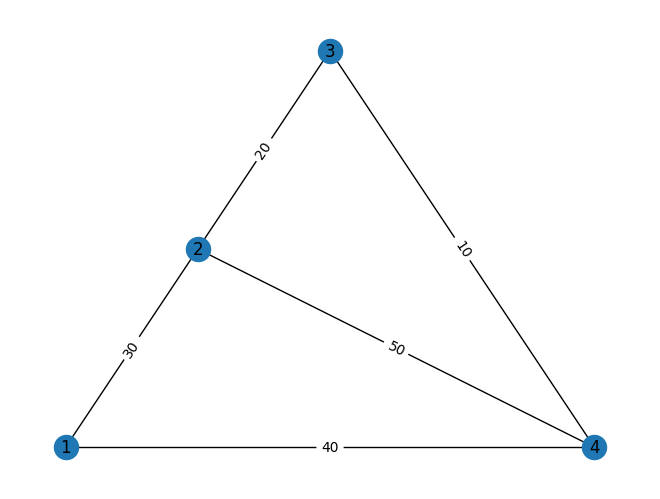

In [ ]:
plotar_grafo_com_entrada(entrada)

## Boss Fight

In [ ]:
tupi = txtToLista("flamengo.txt")
print(tupi)

[4, 4, 3, 0, 3, 3, 1, 3, 8, 2, 3, 10, 1, 2, 3, 0, 3, 1, 0, 1, 2]


O caminho é 0 para 3, o peso máximo é 3 e o melhor trajeto é [0, 3]
O caminho é 1 para 0, o peso máximo é 3 e o melhor trajeto é [1, 3, 0]
O caminho é 1 para 2, o peso máximo é 8 e o melhor trajeto é [1, 3, 2]


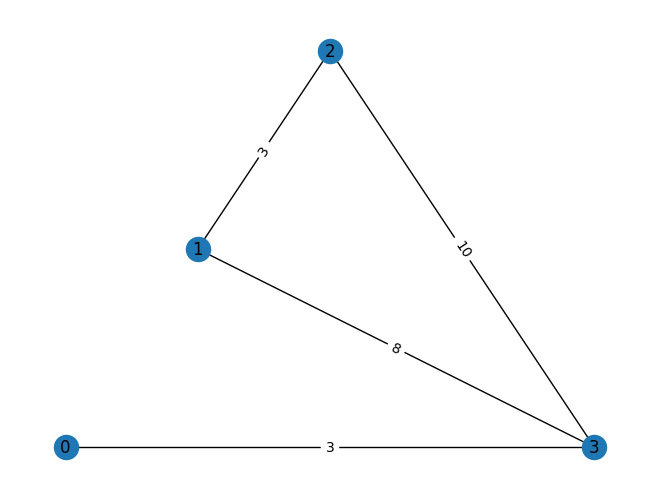

In [ ]:
plotar_grafo_com_entrada(tupi)

In [ ]:
joa = txtToLista("fluminense.txt")
print(joa)

[7, 9, 4, 0, 1, 9, 0, 4, 5, 1, 5, 7, 1, 4, 5, 2, 5, 10, 2, 4, 1, 4, 6, 9, 5, 6, 5, 3, 2, 1, 2, 6, 5, 3, 4, 3, 0, 6]


O caminho é 2 para 6, o peso máximo é 5 e o melhor trajeto é [2, 5, 6]
O caminho é 5 para 3, o peso máximo é 1 e o melhor trajeto é [5, 2, 3]
O caminho é 4 para 3, o peso máximo é 1 e o melhor trajeto é [4, 2, 3]
O caminho é 0 para 6, o peso máximo é 5 e o melhor trajeto é [0, 4, 6]


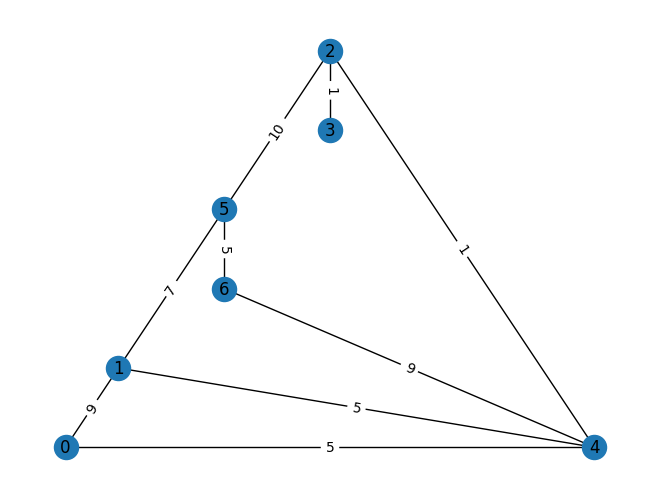

In [ ]:
plotar_grafo_com_entrada(joa)